# **Cross Validation**

* Cross validation is a technique to evaluate a model by splitting the data into a training and a test set.

* The training set is used to train the model, while the test set is used to evaluate the model's performance.


Cross-validation is a statistical technique used in machine learning and data analysis to evaluate how well a model is able to generalize to new data.

In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called the validation dataset or testing set).

The basic idea is to divide the available data into two parts: 
1. a training set, which is used to train the model, and 
2. a validation set, which is used to evaluate the model's performance.

## Types of CV:

* **k-fold cross-validation**
* **train-test split**
* **leave-one-out cross-validation** (LOOCV)
* **stratified cross-validation**
* **Times series cross-validation**
* **Group cross-validation**


## Example of K-fold cross validation

In `k-fold cross-validation`, the available data is divided into k equal parts or "folds". The model is then trained on k-1 of the folds and validated on the remaining fold. This process is repeated k times, with each fold being used once as the validation set. The results from each fold are then averaged to obtain an overall estimate of the model's performance.

### **Summary:**

In summary, cross-validation is a powerful technique for evaluating the performance of machine learning models and can help to ensure that our models are accurate, reliable, and able to generalize to new data.

In [1]:
%%time
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Load the Iris dataset
iris = load_iris()

# Define the Gaussian Naive Bayes model
nb = GaussianNB()

# Perform k-fold cross-validation with k=5
scores = cross_val_score(nb, iris.data, iris.target, cv=5, scoring='accuracy')

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Scores for each fold: [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean score: 0.9533333333333334
Standard deviation: 0.02666666666666666
CPU times: total: 172 ms
Wall time: 4.7 s


# **K-fold Cross Validation vs. train_test split**

K-fold cross-validation and train-test split are two popular techniques used in machine learning to evaluate the performance of a model. Here are some key differences between the two:

1. **Data usage:** 

>In k-fold cross-validation, the data is split into k equal parts or "folds". The model is trained on k-1 of the folds and validated on the remaining fold. This process is repeated k times, with each fold being used once as the validation set. 

> In contrast, train-test split divides the data into two parts: a training set and a testing set, typically with a ratio of 70-30 or 80-20. The model is trained on the training set and evaluated on the testing set.

2. **Data size:** 
> K-fold cross-validation is often used when the dataset is relatively small, as it allows for better use of the available data. 

> In contrast, train-test split is typically used when the dataset is larger, as it is faster to implement and may be sufficient for evaluating the model's performance.

3. **Performance estimation:** 
>K-fold cross-validation provides a more accurate estimate of the model's performance, as it evaluates its performance on multiple independent subsets of the data. This helps to reduce the variance of the performance estimate and detect overfitting. 

>In contrast, train-test split provides a less accurate estimate of the model's performance, as it depends on the specific subset of the data used for testing.

4. **Computation time:** 
>K-fold cross-validation can be computationally expensive, as it requires training and validating the model k times. 

>In contrast, train-test split is faster to implement and requires training and validating the model only once.

Overall, `k-fold cross-validation is a more robust and accurate technique for evaluating the performance of a machine learning model, especially when the dataset is relatively small`. 

`Train-test split is a faster and simpler technique that can be used when the dataset is larger and a quick estimate of the model's performance is needed.`

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the tips dataset
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

# Define the features and target variable
X = tips[['total_bill', 'tip', 'size']]
y = tips['sex']

# Define the Gaussian Naive Bayes model
model = GaussianNB()

# Perform k-fold cross-validation with k=5
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the scores for each fold and the mean score
print("Scores for each fold:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Scores for each fold: [0.55102041 0.55102041 0.59183673 0.65306122 0.54166667]
Mean score: 0.5777210884353741
Standard deviation: 0.04147568336521195


In [3]:
# run train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fit the model on the training set
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6530612244897959


# How to plot k-fold CV?

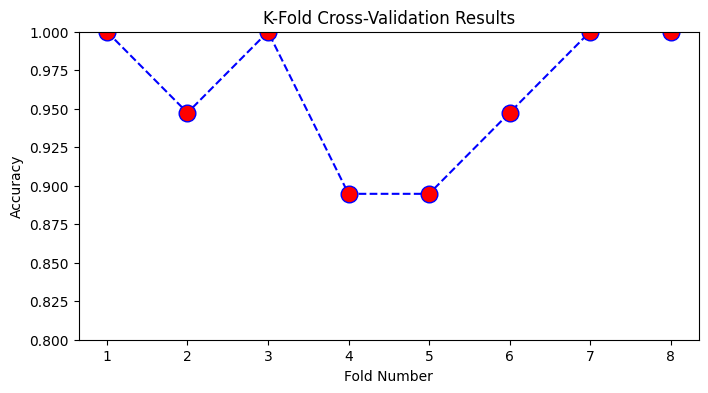

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Perform k-fold cross-validation with k=8
scores = cross_val_score(clf, X, y, cv=8)

# Plot the results
plt.figure(figsize=(8,4))
plt.plot(range(1,9), scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

----